## Importing Libraries

In [198]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

## Loading Dataset

In [2]:
# Load Data set
df = pd.read_csv("telecommunications_churn.csv",delimiter=';')

In [3]:
df1=df.copy()

In [4]:
df1.head(20)

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0
5,118,0,0,223.4,220.6,203.9,6.3,0,1,98,37.98,101,18.75,118,9.18,6,1.70,67.61,0
6,121,1,24,218.2,348.5,212.6,7.5,3,0,88,37.09,108,29.62,118,9.57,7,2.03,78.31,0
7,147,0,0,157.0,103.1,211.8,7.1,0,1,79,26.69,94,8.76,96,9.53,6,1.92,46.90,0
8,117,0,0,184.5,351.6,215.8,8.7,1,0,97,31.37,80,29.89,90,9.71,4,2.35,73.32,0
9,141,1,37,258.6,222.0,326.4,11.2,0,1,84,43.96,111,18.87,97,14.69,5,3.02,80.54,0


## 1. Exploratory Data Analysis

In [5]:
#data Structure
df1.shape

(3333, 19)

There are **333 rows and 19 coloumns** in the Data Set

### 1.1 Check Data type

In [6]:
# data types
df1.dtypes

account_length              int64
voice_mail_plan             int64
voice_mail_messages         int64
day_mins                  float64
evening_mins              float64
night_mins                float64
international_mins        float64
customer_service_calls      int64
international_plan          int64
day_calls                   int64
day_charge                float64
evening_calls               int64
evening_charge            float64
night_calls                 int64
night_charge              float64
international_calls         int64
international_charge      float64
total_charge              float64
churn                       int64
dtype: object

In [7]:
# change 'Class' data type to Categoric
df1['churn']=df1['churn'].astype('category')   

In [8]:
df1['churn'].dtypes

CategoricalDtype(categories=[0, 1], ordered=False)

All the data types are correct

### 1.2 Check for Null values

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   account_length          3333 non-null   int64   
 1   voice_mail_plan         3333 non-null   int64   
 2   voice_mail_messages     3333 non-null   int64   
 3   day_mins                3333 non-null   float64 
 4   evening_mins            3333 non-null   float64 
 5   night_mins              3333 non-null   float64 
 6   international_mins      3333 non-null   float64 
 7   customer_service_calls  3333 non-null   int64   
 8   international_plan      3333 non-null   int64   
 9   day_calls               3333 non-null   int64   
 10  day_charge              3333 non-null   float64 
 11  evening_calls           3333 non-null   int64   
 12  evening_charge          3333 non-null   float64 
 13  night_calls             3333 non-null   int64   
 14  night_charge            

In [10]:
df1.isnull().sum()

account_length            0
voice_mail_plan           0
voice_mail_messages       0
day_mins                  0
evening_mins              0
night_mins                0
international_mins        0
customer_service_calls    0
international_plan        0
day_calls                 0
day_charge                0
evening_calls             0
evening_charge            0
night_calls               0
night_charge              0
international_calls       0
international_charge      0
total_charge              0
churn                     0
dtype: int64

There are no **NULL values** in the dataset

### 1.3 Check for Duplicates

In [11]:
#Count of duplicated rows
df1[df1.duplicated()].shape 

(0, 19)

There are **no duplicate rows** in the dataset

### 1.4 Checking Correlation

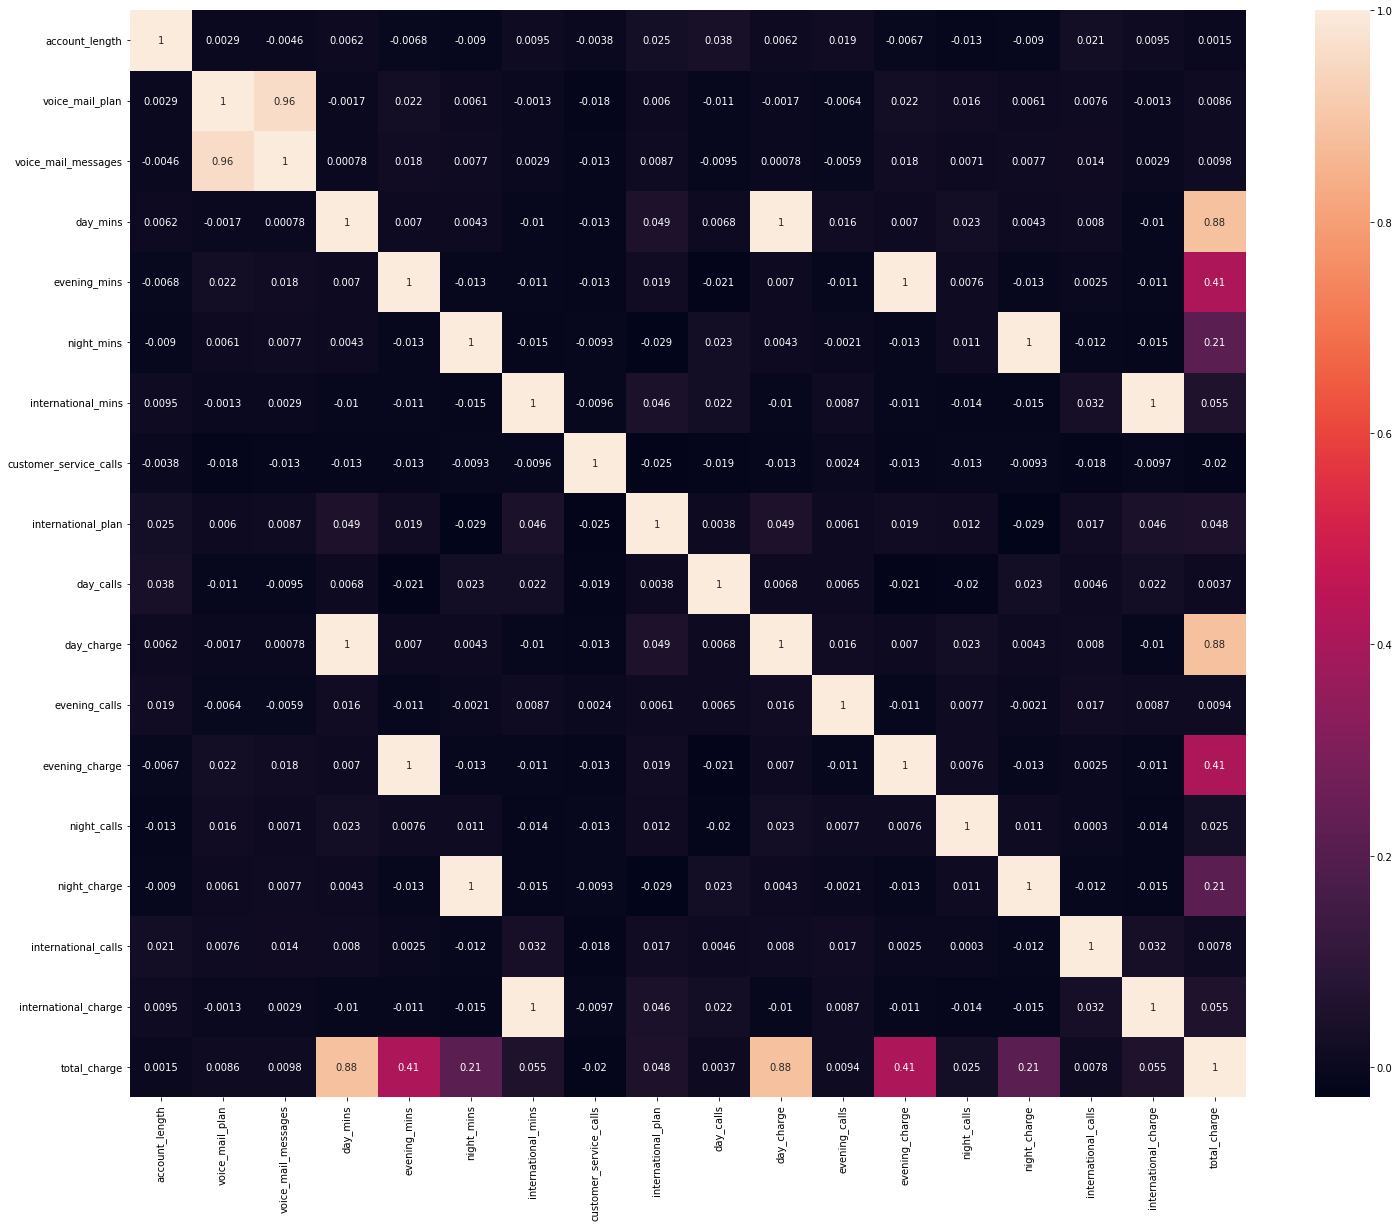

In [12]:
fig = plt.figure(figsize=(25,20))
sns.heatmap(df1.corr(), annot=True); # annot will display values inside each box

### 1.5 Check Churn and No Churn counts in Data Set

1 means churn and 0 means No churn

In [13]:
count_No_Churn = len(df1[df1['churn']== 0])
print(count_No_Churn)

2850


In [14]:
count_Churn = len(df1[df1['churn']== 1])
print(count_Churn)

483


In [15]:
np.round((count_Churn / (count_Churn + count_No_Churn))*100,2)

14.49

####  There are 14.5% of Churn cases in the given data set 

<AxesSubplot:>

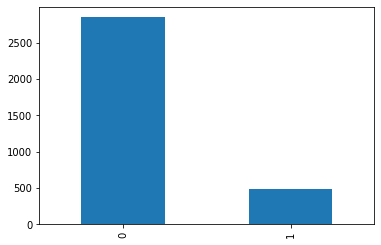

In [16]:
## Check for Outliers for categorical Variable using Bar plot
df1['churn'].value_counts().plot.bar()

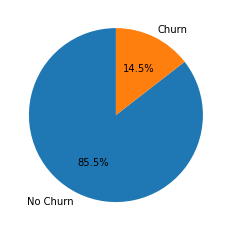

In [17]:
label=['No Churn','Churn']
plt.pie(df1['churn'].value_counts(),labels=label,autopct='%1.1f%%',startangle=90)
plt.show()

In [18]:
df1.describe()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.276628,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.096910,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,59.449754
std,39.822106,0.447398,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.295879,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,10.502261
min,1.000000,0.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,22.930000
25%,74.000000,0.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,52.380000
50%,101.000000,0.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,59.470000
75%,127.000000,1.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,66.480000
max,243.000000,1.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,96.150000


### 1.6 Checking Data distribution

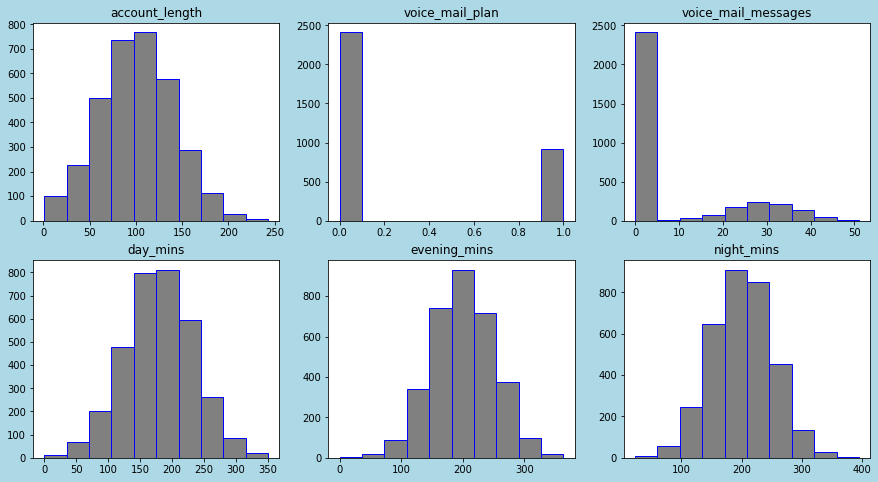

In [19]:
plt.figure(figsize=(15,8),facecolor='lightblue')
plt.subplot(2,3,1)
plt.hist(df1['account_length'],facecolor ="grey",edgecolor ="blue",bins =10)
plt.title("account_length")
plt.subplot(2,3,2)
plt.hist(df1['voice_mail_plan'],facecolor ="grey",edgecolor ="blue",bins =10)
plt.title("voice_mail_plan")
plt.subplot(2,3,3)
plt.hist(df1['voice_mail_messages'],facecolor ="grey",edgecolor ="blue",bins =10)
plt.title("voice_mail_messages")
plt.subplot(2,3,4)
plt.hist(df1['day_mins'],facecolor ="grey",edgecolor ="blue",bins =10)
plt.title("day_mins")
plt.subplot(2,3,5)
plt.hist(df1['evening_mins'],facecolor ="grey",edgecolor ="blue",bins =10)
plt.title("evening_mins")
plt.subplot(2,3,6)
plt.hist(df1['night_mins'],facecolor ="grey",edgecolor ="blue",bins =10)
plt.title("night_mins")
plt.show()

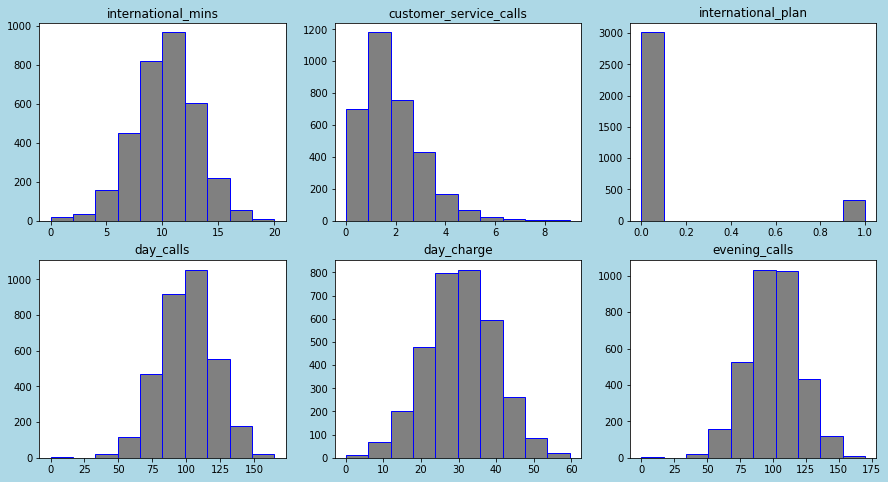

In [20]:
plt.figure(figsize=(15,8),facecolor='lightblue')
plt.subplot(2,3,1)
plt.hist(df1['international_mins'],facecolor ="grey",edgecolor ="blue",bins =10)
plt.title("international_mins")
plt.subplot(2,3,2)
plt.hist(df1['customer_service_calls'],facecolor ="grey",edgecolor ="blue",bins =10)
plt.title("customer_service_calls")
plt.subplot(2,3,3)
plt.hist(df1['international_plan'],facecolor ="grey",edgecolor ="blue",bins =10)
plt.title("international_plan")
plt.subplot(2,3,4)
plt.hist(df1['day_calls'],facecolor ="grey",edgecolor ="blue",bins =10)
plt.title("day_calls")
plt.subplot(2,3,5)
plt.hist(df1['day_charge'],facecolor ="grey",edgecolor ="blue",bins =10)
plt.title("day_charge")
plt.subplot(2,3,6)
plt.hist(df1['evening_calls'],facecolor ="grey",edgecolor ="blue",bins =10)
plt.title("evening_calls")
plt.show()

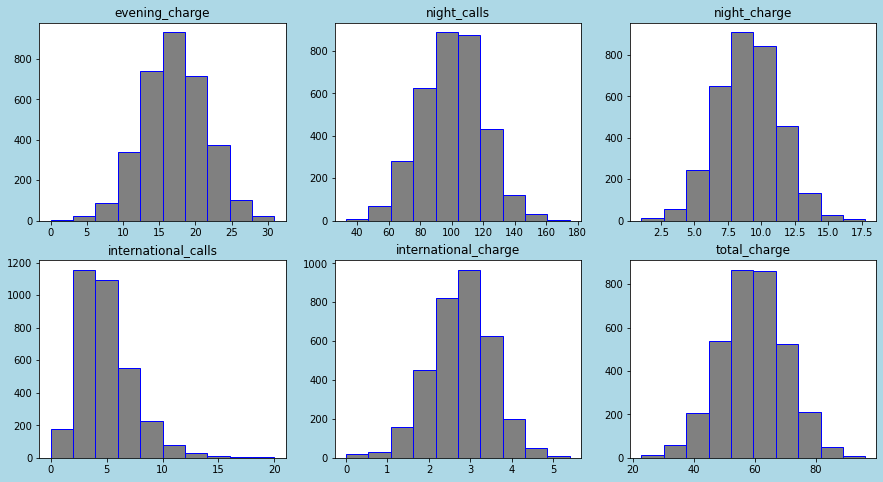

In [21]:
plt.figure(figsize=(15,8),facecolor='lightblue')
plt.subplot(2,3,1)
plt.hist(df1['evening_charge'],facecolor ="grey",edgecolor ="blue",bins =10)
plt.title("evening_charge")
plt.subplot(2,3,2)
plt.hist(df1['night_calls'],facecolor ="grey",edgecolor ="blue",bins =10)
plt.title("night_calls")
plt.subplot(2,3,3)
plt.hist(df1['night_charge'],facecolor ="grey",edgecolor ="blue",bins =10)
plt.title("night_charge")
plt.subplot(2,3,4)
plt.hist(df1['international_calls'],facecolor ="grey",edgecolor ="blue",bins =10)
plt.title("international_calls")
plt.subplot(2,3,5)
plt.hist(df1['international_charge'],facecolor ="grey",edgecolor ="blue",bins =10)
plt.title("international_charge")
plt.subplot(2,3,6)
plt.hist(df1['total_charge'],facecolor ="grey",edgecolor ="blue",bins =10)
plt.title("total_charge")
plt.show()

### 1.7 Outlier check using Box plot

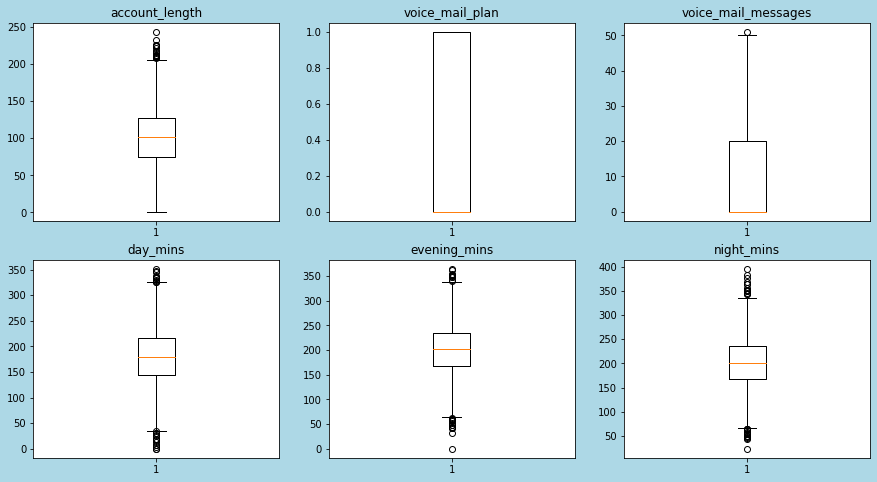

In [22]:
plt.figure(figsize=(15,8),facecolor='lightblue')
plt.subplot(2,3,1)
plt.boxplot(df1['account_length'])
plt.title("account_length")
plt.subplot(2,3,2)
plt.boxplot(df1['voice_mail_plan'])
plt.title("voice_mail_plan")
plt.subplot(2,3,3)
plt.boxplot(df1['voice_mail_messages'])
plt.title("voice_mail_messages")
plt.subplot(2,3,4)
plt.boxplot(df1['day_mins'])
plt.title("day_mins")
plt.subplot(2,3,5)
plt.boxplot(df1['evening_mins'])
plt.title("evening_mins")
plt.subplot(2,3,6)
plt.boxplot(df1['night_mins'])
plt.title("night_mins")
plt.show()

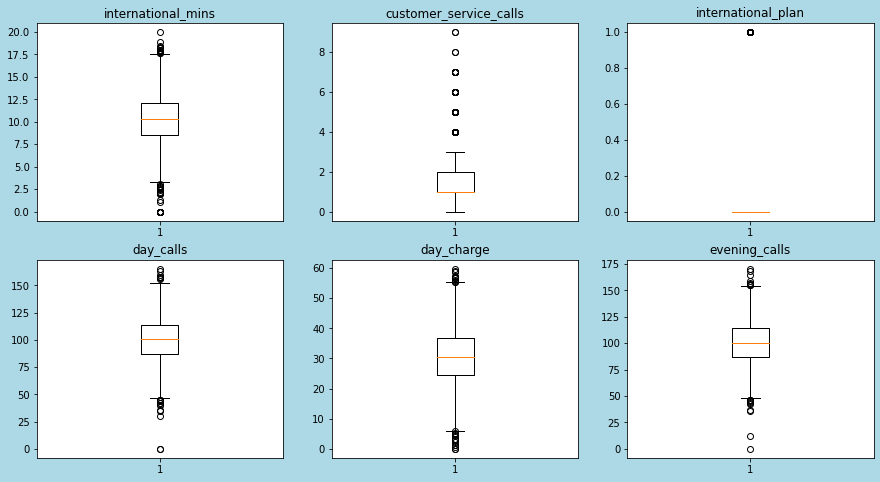

In [23]:
plt.figure(figsize=(15,8),facecolor='lightblue')
plt.subplot(2,3,1)
plt.boxplot(df1['international_mins'])
plt.title("international_mins")
plt.subplot(2,3,2)
plt.boxplot(df1['customer_service_calls'])
plt.title("customer_service_calls")
plt.subplot(2,3,3)
plt.boxplot(df1['international_plan'])
plt.title("international_plan")
plt.subplot(2,3,4)
plt.boxplot(df1['day_calls'])
plt.title("day_calls")
plt.subplot(2,3,5)
plt.boxplot(df1['day_charge'])
plt.title("day_charge")
plt.subplot(2,3,6)
plt.boxplot(df1['evening_calls'])
plt.title("evening_calls")
plt.show()

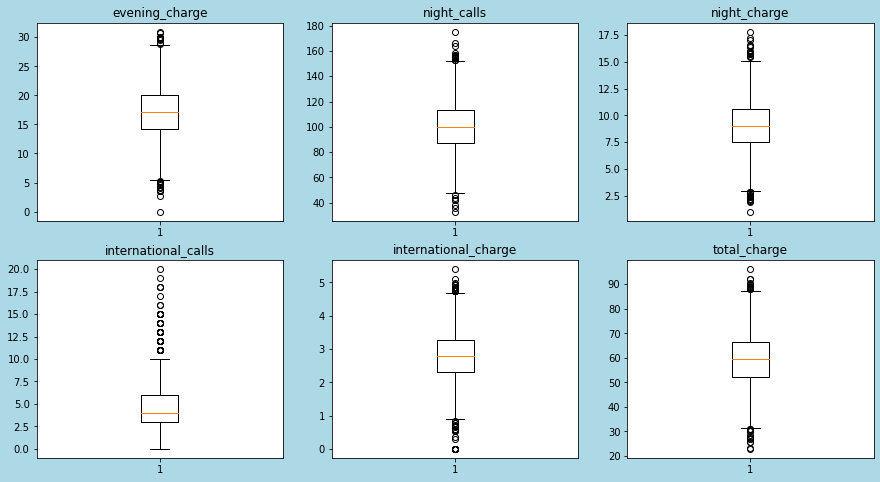

In [24]:
plt.figure(figsize=(15,8),facecolor='lightblue')
plt.subplot(2,3,1)
plt.boxplot(df1['evening_charge'])
plt.title("evening_charge")
plt.subplot(2,3,2)
plt.boxplot(df1['night_calls'])
plt.title("night_calls")
plt.subplot(2,3,3)
plt.boxplot(df1['night_charge'])
plt.title("night_charge")
plt.subplot(2,3,4)
plt.boxplot(df1['international_calls'])
plt.title("international_calls")
plt.subplot(2,3,5)
plt.boxplot(df1['international_charge'])
plt.title("international_charge")
plt.subplot(2,3,6)
plt.boxplot(df1['total_charge'])
plt.title("total_charge")
plt.show()

In [25]:
# Check Outliers count in each column

In [26]:
#outliers in 'account_length' column
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code

In [27]:
sample_outliers = detect_outliers_iqr(df1['account_length'])
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [208, 209, 209, 209, 210, 210, 212, 212, 215, 217, 217, 221, 224, 224, 225, 225, 232, 243]


In [28]:
len(outliers)

18

In [29]:
# There are 18 outliers in 'account_length' column

In [30]:
df1[df1['account_length']==243]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
817,243,0,0,95.5,163.7,264.2,6.6,2,0,92,16.24,63,13.91,118,11.89,6,1.78,43.82,0


In [31]:
#outliers in 'voice_mail_plan' column
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code

sample_outliers = detect_outliers_iqr(df1['voice_mail_plan'])
print("Outliers from IQR method: ", sample_outliers)
print(len(outliers))

Outliers from IQR method:  []
0


In [32]:
#outliers in 'voice_mail_messages' column
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code

sample_outliers = detect_outliers_iqr(df1['voice_mail_messages'])
print("Outliers from IQR method: ", sample_outliers)
print(len(outliers))

Outliers from IQR method:  [51]
1


In [33]:
#outliers in 'day_mins' column
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code

sample_outliers = detect_outliers_iqr(df1['day_mins'])
print("Outliers from IQR method: ", sample_outliers)
print(len(outliers))

Outliers from IQR method:  [0.0, 0.0, 2.6, 7.8, 7.9, 12.5, 17.6, 18.9, 19.5, 25.9, 27.0, 29.9, 30.9, 34.0, 326.3, 326.5, 328.1, 329.8, 332.9, 334.3, 335.5, 337.4, 345.3, 346.8, 350.8]
25


In [34]:
#outliers in 'evening_mins' column
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code

sample_outliers = detect_outliers_iqr(df1['evening_mins'])
print("Outliers from IQR method: ", sample_outliers)
print(len(outliers))

Outliers from IQR method:  [0.0, 31.2, 42.2, 42.5, 43.9, 48.1, 49.2, 52.9, 56.0, 58.6, 58.9, 60.0, 60.8, 61.9, 339.9, 341.3, 347.3, 348.5, 350.5, 350.9, 351.6, 354.2, 361.8, 363.7]
24


In [35]:
#outliers in 'night_mins' column
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code

sample_outliers = detect_outliers_iqr(df1['night_mins'])
print("Outliers from IQR method: ", sample_outliers)
print(len(outliers))

Outliers from IQR method:  [23.2, 43.7, 45.0, 47.4, 50.1, 50.1, 53.3, 54.0, 54.5, 56.6, 57.5, 61.4, 63.3, 63.6, 64.2, 342.8, 344.3, 345.8, 349.2, 349.7, 350.2, 352.2, 352.5, 354.9, 364.3, 364.9, 367.7, 377.5, 381.9, 395.0]
30


In [36]:
#outliers in 'international_mins' column
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code

sample_outliers = detect_outliers_iqr(df1['international_mins'])
print("Outliers from IQR method: ", sample_outliers)
print(len(outliers))

Outliers from IQR method:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1, 1.3, 2.0, 2.0, 2.1, 2.1, 2.2, 2.4, 2.5, 2.6, 2.7, 2.9, 2.9, 3.1, 17.6, 17.6, 17.8, 17.8, 17.9, 18.0, 18.0, 18.0, 18.2, 18.2, 18.3, 18.4, 18.9, 20.0]
46


In [37]:
#outliers in 'customer_service_calls' column
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code

sample_outliers = detect_outliers_iqr(df1['customer_service_calls'])
print("Outliers from IQR method: ", sample_outliers)
print(len(outliers))

Outliers from IQR method:  [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 9, 9]
267


In [38]:
#outliers in 'international_plan' column
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code

sample_outliers = detect_outliers_iqr(df1['international_plan'])
print("Outliers from IQR method: ", sample_outliers)
print(len(outliers))

Outliers from IQR method:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
323

In [39]:
#outliers in 'day_calls' column
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code

sample_outliers = detect_outliers_iqr(df1['day_calls'])
print("Outliers from IQR method: ", sample_outliers)
print(len(outliers))

Outliers from IQR method:  [0, 0, 30, 35, 36, 40, 40, 42, 42, 44, 44, 44, 45, 45, 45, 156, 157, 158, 158, 158, 160, 163, 165]
23


In [40]:
#outliers in 'day_charge' column
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code

sample_outliers = detect_outliers_iqr(df1['day_charge'])
print("Outliers from IQR method: ", sample_outliers)
print(len(outliers))

Outliers from IQR method:  [0.0, 0.0, 0.44, 1.33, 1.34, 2.13, 2.99, 3.21, 3.32, 4.4, 4.59, 5.08, 5.25, 5.78, 55.47, 55.51, 55.78, 56.07, 56.59, 56.83, 57.04, 57.36, 58.7, 58.96, 59.64]
25


In [41]:
#outliers in 'evening_calls' column
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code

sample_outliers = detect_outliers_iqr(df1['evening_calls'])
print("Outliers from IQR method: ", sample_outliers)
print(len(outliers))

Outliers from IQR method:  [0, 12, 36, 37, 42, 43, 44, 45, 46, 46, 46, 155, 155, 155, 156, 157, 159, 164, 168, 170]
20


In [42]:
#outliers in 'evening_charge' column
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code

sample_outliers = detect_outliers_iqr(df1['evening_charge'])
print("Outliers from IQR method: ", sample_outliers)
print(len(outliers))

Outliers from IQR method:  [0.0, 2.65, 3.59, 3.61, 3.73, 4.09, 4.18, 4.5, 4.76, 4.98, 5.01, 5.1, 5.17, 5.26, 28.89, 29.01, 29.52, 29.62, 29.79, 29.83, 29.89, 30.11, 30.75, 30.91]
24


In [43]:
#outliers in 'night_calls' column
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code

sample_outliers = detect_outliers_iqr(df1['night_calls'])
print("Outliers from IQR method: ", sample_outliers)
print(len(outliers))

Outliers from IQR method:  [33, 36, 38, 42, 42, 44, 46, 153, 153, 153, 154, 154, 155, 155, 156, 156, 157, 157, 158, 164, 166, 175]
22


In [44]:
#outliers in 'night_charge' column
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code

sample_outliers = detect_outliers_iqr(df1['night_charge'])
print("Outliers from IQR method: ", sample_outliers)
print(len(outliers))

Outliers from IQR method:  [1.04, 1.97, 2.03, 2.13, 2.25, 2.25, 2.4, 2.43, 2.45, 2.55, 2.59, 2.76, 2.85, 2.86, 2.89, 15.43, 15.49, 15.56, 15.71, 15.74, 15.76, 15.85, 15.86, 15.97, 16.39, 16.42, 16.55, 16.99, 17.19, 17.77]
30


In [45]:
#outliers in 'international_calls' column
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code

sample_outliers = detect_outliers_iqr(df1['international_calls'])
print("Outliers from IQR method: ", sample_outliers)
print(len(outliers))

Outliers from IQR method:  [11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 16, 16, 17, 18, 18, 18, 19, 20]
78


In [46]:
#outliers in 'international_charge' column
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code

sample_outliers = detect_outliers_iqr(df1['international_charge'])
print("Outliers from IQR method: ", sample_outliers)
print(len(outliers))

Outliers from IQR method:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.35, 0.54, 0.54, 0.57, 0.57, 0.59, 0.65, 0.68, 0.7, 0.73, 0.78, 0.78, 0.84, 4.73, 4.73, 4.73, 4.75, 4.75, 4.81, 4.81, 4.83, 4.86, 4.86, 4.86, 4.91, 4.91, 4.94, 4.97, 5.1, 5.4]
49


In [47]:
#outliers in 'total_charge' column
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code

sample_outliers = detect_outliers_iqr(df1['total_charge'])
print("Outliers from IQR method: ", sample_outliers)
print(len(outliers))

Outliers from IQR method:  [22.93, 23.25, 25.52, 25.87, 27.02, 27.08, 27.54, 27.77, 28.73, 30.04, 30.18, 30.21, 30.48, 30.83, 31.05, 87.89, 88.13, 88.39, 88.66, 88.97, 89.31, 89.76, 90.12, 90.46, 92.2, 92.29, 96.15]
27


In [48]:
data1=[['account_length',18],['voice_mail_plan',0],['voice_mail_messages',1],['day_mins',25],['evening_mins',24],['night_mins',30],['international_mins',46],['customer_service_calls',267],['international_plan',323],['day_calls',23],['day_charge',25],['evening_calls',20],['evening_charge',24],['night_calls',22],['night_charge',30],['international_calls',78],['international_charge',49],['total_charge',27]]

In [49]:
pd.DataFrame(data1,columns=['Variable_Name','Outlier_Count'])

,Variable_Name,Outlier_Count
0,account_length,18
1,voice_mail_plan,0
2,voice_mail_messages,1
3,day_mins,25
4,evening_mins,24
5,night_mins,30
6,international_mins,46
7,customer_service_calls,267
8,international_plan,323
9,day_calls,23


### 1.8 Imputing Outliers using Winsorizing

In [50]:
df2=df1.copy()

In [51]:
from scipy.stats.mstats import winsorize

In [52]:
upper_limit_1 = df2['account_length'].quantile(0.99)
lower_limit_1= df2['account_length'].quantile(0.01)

In [53]:
df2['account_length'] = np.where(df2['account_length'] >= upper_limit_1,
        upper_limit_1,
        np.where(df2['account_length'] <= lower_limit_1,
        lower_limit_1,
        df2['account_length']))

In [54]:
df1['account_length'].describe()

count    3333.000000
mean      101.064806
std        39.822106
min         1.000000
25%        74.000000
50%       101.000000
75%       127.000000
max       243.000000
Name: account_length, dtype: float64

In [55]:
df2['account_length'].describe()

count    3333.000000
mean      100.981362
std        39.276205
min        12.320000
25%        74.000000
50%       101.000000
75%       127.000000
max       195.000000
Name: account_length, dtype: float64

In [56]:
upper_limit_2 = df2['voice_mail_messages'].quantile(0.99)
lower_limit_2= df2['voice_mail_messages'].quantile(0.01)

In [57]:
df2['voice_mail_messages'] = np.where(df2['voice_mail_messages'] >= upper_limit_2,
        upper_limit_2,
        np.where(df2['voice_mail_messages'] <= lower_limit_2,
        lower_limit_2,
        df2['voice_mail_messages']))

In [58]:
df1['voice_mail_messages'].describe()

count    3333.000000
mean        8.099010
std        13.688365
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        51.000000
Name: voice_mail_messages, dtype: float64

In [59]:
df2['voice_mail_messages'].describe()

count    3333.000000
mean        8.074707
std        13.622222
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        43.000000
Name: voice_mail_messages, dtype: float64

In [60]:
upper_limit_3 = df2['day_mins'].quantile(0.99)
lower_limit_3= df2['day_mins'].quantile(0.01)

In [61]:
df2['day_mins'] = np.where(df2['day_mins'] >= upper_limit_3,
        upper_limit_3,
        np.where(df2['day_mins'] <= lower_limit_3,
        lower_limit_3,
        df2['day_mins']))

In [62]:
upper_limit_4 = df2['evening_mins'].quantile(0.99)
lower_limit_4= df2['evening_mins'].quantile(0.01)

In [63]:
df2['evening_mins'] = np.where(df2['evening_mins'] >= upper_limit_4,
        upper_limit_4,
        np.where(df2['evening_mins'] <= lower_limit_4,
        lower_limit_4,
        df2['evening_mins']))

In [64]:
df1['evening_mins'].describe()

count    3333.000000
mean      200.980348
std        50.713844
min         0.000000
25%       166.600000
50%       201.400000
75%       235.300000
max       363.700000
Name: evening_mins, dtype: float64

In [65]:
df2['evening_mins'].describe()

count    3333.000000
mean      201.000852
std        49.821440
min        79.524000
25%       166.600000
50%       201.400000
75%       235.300000
max       318.936000
Name: evening_mins, dtype: float64

In [66]:
upper_limit_5 = df2['night_mins'].quantile(0.99)
lower_limit_5= df2['night_mins'].quantile(0.01)
df2['night_mins'] = np.where(df2['night_mins'] >= upper_limit_5,
        upper_limit_5,
        np.where(df2['night_mins'] <= lower_limit_5,
        lower_limit_5,
        df2['night_mins']))

In [67]:
df1['night_mins'].describe()

count    3333.000000
mean      200.872037
std        50.573847
min        23.200000
25%       167.000000
50%       201.200000
75%       235.300000
max       395.000000
Name: night_mins, dtype: float64

In [68]:
df2['night_mins'].describe()

count    3333.000000
mean      200.791174
std        49.519955
min        79.428000
25%       167.000000
50%       201.200000
75%       235.300000
max       317.448000
Name: night_mins, dtype: float64

In [69]:
upper_limit_6 = df2['international_mins'].quantile(0.99)
lower_limit_6= df2['international_mins'].quantile(0.01)
df2['international_mins'] = np.where(df2['international_mins'] >= upper_limit_6,
        upper_limit_6,
        np.where(df2['international_mins'] <= lower_limit_6,
        lower_limit_6,
        df2['international_mins']))

In [70]:
df1['international_mins'].describe()

count    3333.000000
mean       10.237294
std         2.791840
min         0.000000
25%         8.500000
50%        10.300000
75%        12.100000
max        20.000000
Name: international_mins, dtype: float64

In [71]:
df2['international_mins'].describe()

count    3333.000000
mean       10.250945
std         2.700478
min         3.332000
25%         8.500000
50%        10.300000
75%        12.100000
max        16.668000
Name: international_mins, dtype: float64

In [72]:
upper_limit_8 = df2['customer_service_calls'].quantile(0.99)
lower_limit_8= df2['customer_service_calls'].quantile(0.01)
df2['customer_service_calls'] = np.where(df2['customer_service_calls'] >= upper_limit_8,
        upper_limit_8,
        np.where(df2['customer_service_calls'] <= lower_limit_8,
        lower_limit_8,
        df2['customer_service_calls']))

In [73]:
df1['customer_service_calls'].describe()

count    3333.000000
mean        1.562856
std         1.315491
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: customer_service_calls, dtype: float64

In [74]:
df2['customer_service_calls'].describe()

count    3333.000000
mean        1.557156
std         1.292043
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: customer_service_calls, dtype: float64

In [75]:
upper_limit_9 = df2['day_calls'].quantile(0.99)
lower_limit_9= df2['day_calls'].quantile(0.01)
df2['day_calls'] = np.where(df2['day_calls'] >= upper_limit_9,
        upper_limit_9,
        np.where(df2['day_calls'] <= lower_limit_9,
        lower_limit_9,
        df2['day_calls']))

In [76]:
df1['day_calls'].describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: day_calls, dtype: float64

In [77]:
df2['day_calls'].describe()

count    3333.000000
mean      100.482748
std        19.628346
min        54.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       146.000000
Name: day_calls, dtype: float64

In [78]:
upper_limit_10 = df2['day_charge'].quantile(0.99)
lower_limit_10= df2['day_charge'].quantile(0.01)
df2['day_charge'] = np.where(df2['day_charge'] >= upper_limit_10,
        upper_limit_10,
        np.where(df2['day_charge'] <= lower_limit_10,
        lower_limit_10,
        df2['day_charge']))

In [79]:
df1['day_charge'].describe()

count    3333.000000
mean       30.562307
std         9.259435
min         0.000000
25%        24.430000
50%        30.500000
75%        36.790000
max        59.640000
Name: day_charge, dtype: float64

In [80]:
df2['day_charge'].describe()

count    3333.000000
mean       30.565254
std         9.100850
min         8.813200
25%        24.430000
50%        30.500000
75%        36.790000
max        51.876800
Name: day_charge, dtype: float64

In [81]:
upper_limit_11 = df2['evening_calls'].quantile(0.99)
lower_limit_11= df2['evening_calls'].quantile(0.01)
df2['evening_calls'] = np.where(df2['evening_calls'] >= upper_limit_11,
        upper_limit_11,
        np.where(df2['evening_calls'] <= lower_limit_11,
        lower_limit_11,
        df2['evening_calls']))

In [82]:
df1['evening_calls'].describe()

count    3333.000000
mean      100.114311
std        19.922625
min         0.000000
25%        87.000000
50%       100.000000
75%       114.000000
max       170.000000
Name: evening_calls, dtype: float64

In [83]:
df2['evening_calls'].describe()

count    3333.000000
mean      100.129913
std        19.546408
min        53.000000
25%        87.000000
50%       100.000000
75%       114.000000
max       147.000000
Name: evening_calls, dtype: float64

In [84]:
upper_limit_12 = df2['evening_charge'].quantile(0.99)
lower_limit_12= df2['evening_charge'].quantile(0.01)
df2['evening_charge'] = np.where(df2['evening_charge'] >= upper_limit_12,
        upper_limit_12,
        np.where(df2['evening_charge'] <= lower_limit_12,
        lower_limit_12,
        df2['evening_charge']))

In [85]:
df1['evening_charge'].describe()

count    3333.000000
mean       17.083540
std         4.310668
min         0.000000
25%        14.160000
50%        17.120000
75%        20.000000
max        30.910000
Name: evening_charge, dtype: float64

In [86]:
df2['evening_charge'].describe()

count    3333.000000
mean       17.085312
std         4.234920
min         6.759200
25%        14.160000
50%        17.120000
75%        20.000000
max        27.113600
Name: evening_charge, dtype: float64

In [87]:
upper_limit_13 = df2['night_calls'].quantile(0.99)
lower_limit_13= df2['night_calls'].quantile(0.01)
df2['night_calls'] = np.where(df2['night_calls'] >= upper_limit_13,
        upper_limit_13,
        np.where(df2['night_calls'] <= lower_limit_13,
        lower_limit_13,
        df2['night_calls']))

In [88]:
df1['night_calls'].describe()

count    3333.000000
mean      100.107711
std        19.568609
min        33.000000
25%        87.000000
50%       100.000000
75%       113.000000
max       175.000000
Name: night_calls, dtype: float64

In [89]:
df2['night_calls'].describe()

count    3333.000000
mean      100.110447
std        19.223828
min        57.000000
25%        87.000000
50%       100.000000
75%       113.000000
max       146.680000
Name: night_calls, dtype: float64

In [90]:
upper_limit_14 = df2['night_charge'].quantile(0.99)
lower_limit_14= df2['night_charge'].quantile(0.01)
df2['night_charge'] = np.where(df2['night_charge'] >= upper_limit_14,
        upper_limit_14,
        np.where(df2['night_charge'] <= lower_limit_14,
        lower_limit_14,
        df2['night_charge']))

In [91]:
df1['night_charge'].describe()

count    3333.000000
mean        9.039325
std         2.275873
min         1.040000
25%         7.520000
50%         9.050000
75%        10.590000
max        17.770000
Name: night_charge, dtype: float64

In [92]:
df2['night_charge'].describe()

count    3333.000000
mean        9.035696
std         2.228369
min         3.576400
25%         7.520000
50%         9.050000
75%        10.590000
max        14.284000
Name: night_charge, dtype: float64

In [93]:
upper_limit_15 = df2['international_calls'].quantile(0.99)
lower_limit_15= df2['international_calls'].quantile(0.01)
df2['international_calls'] = np.where(df2['international_calls'] >= upper_limit_15,
        upper_limit_15,
        np.where(df2['international_calls'] <= lower_limit_15,
        lower_limit_15,
        df2['international_calls']))

In [94]:
df1['international_calls'].describe()

count    3333.000000
mean        4.479448
std         2.461214
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        20.000000
Name: international_calls, dtype: float64

In [95]:
df2['international_calls'].describe()

count    3333.000000
mean        4.467447
std         2.376841
min         1.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        13.000000
Name: international_calls, dtype: float64

In [96]:
upper_limit_16 = df2['international_charge'].quantile(0.99)
lower_limit_16= df2['international_charge'].quantile(0.01)
df2['international_charge'] = np.where(df2['international_charge'] >= upper_limit_16,
        upper_limit_16,
        np.where(df2['international_charge'] <= lower_limit_16,
        lower_limit_16,
        df2['international_charge']))

In [97]:
df1['international_charge'].describe()

count    3333.000000
mean        2.764581
std         0.753773
min         0.000000
25%         2.300000
50%         2.780000
75%         3.270000
max         5.400000
Name: international_charge, dtype: float64

In [98]:
df2['international_charge'].describe()

count    3333.000000
mean        2.768269
std         0.729117
min         0.899600
25%         2.300000
50%         2.780000
75%         3.270000
max         4.500400
Name: international_charge, dtype: float64

In [99]:
upper_limit_17 = df2['total_charge'].quantile(0.99)
lower_limit_17= df2['total_charge'].quantile(0.01)
df2['total_charge'] = np.where(df2['total_charge'] >= upper_limit_17,
        upper_limit_17,
        np.where(df2['total_charge'] <= lower_limit_17,
        lower_limit_17,
        df2['total_charge']))

In [100]:
df1['total_charge'].describe()

count    3333.000000
mean       59.449754
std        10.502261
min        22.930000
25%        52.380000
50%        59.470000
75%        66.480000
max        96.150000
Name: total_charge, dtype: float64

In [101]:
df2['total_charge'].describe()

count    3333.000000
mean       59.446506
std        10.329150
min        33.853200
25%        52.380000
50%        59.470000
75%        66.480000
max        83.839600
Name: total_charge, dtype: float64

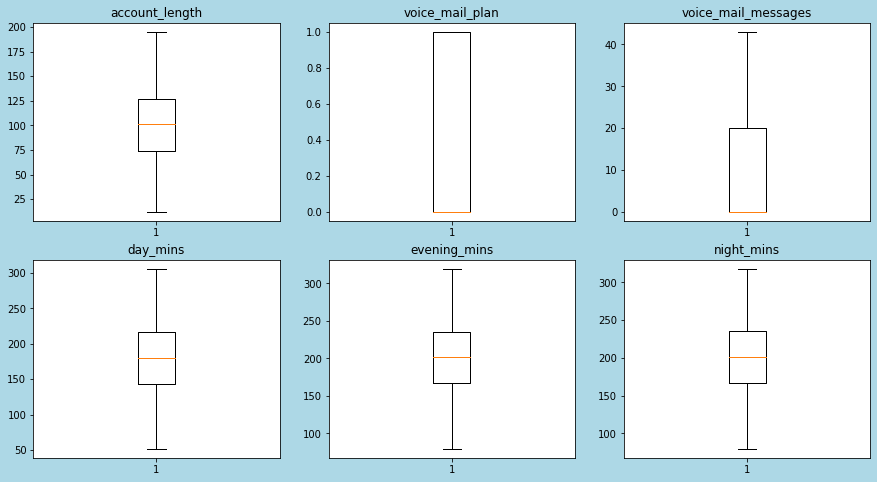

In [102]:
#Box plot after Outlier Removal
plt.figure(figsize=(15,8),facecolor='lightblue')
plt.subplot(2,3,1)
plt.boxplot(df2['account_length'])
plt.title("account_length")
plt.subplot(2,3,2)
plt.boxplot(df2['voice_mail_plan'])
plt.title("voice_mail_plan")
plt.subplot(2,3,3)
plt.boxplot(df2['voice_mail_messages'])
plt.title("voice_mail_messages")
plt.subplot(2,3,4)
plt.boxplot(df2['day_mins'])
plt.title("day_mins")
plt.subplot(2,3,5)
plt.boxplot(df2['evening_mins'])
plt.title("evening_mins")
plt.subplot(2,3,6)
plt.boxplot(df2['night_mins'])
plt.title("night_mins")
plt.show()

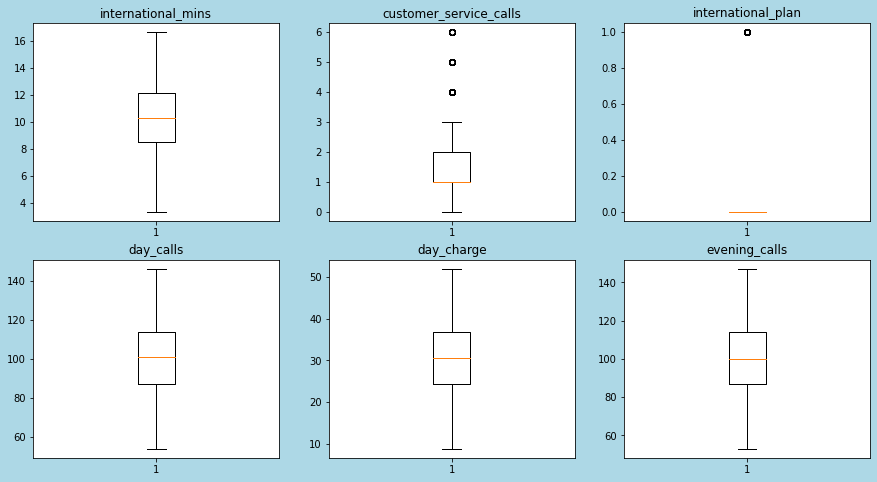

In [103]:
plt.figure(figsize=(15,8),facecolor='lightblue')
plt.subplot(2,3,1)
plt.boxplot(df2['international_mins'])
plt.title("international_mins")
plt.subplot(2,3,2)
plt.boxplot(df2['customer_service_calls'])
plt.title("customer_service_calls")
plt.subplot(2,3,3)
plt.boxplot(df2['international_plan'])
plt.title("international_plan")
plt.subplot(2,3,4)
plt.boxplot(df2['day_calls'])
plt.title("day_calls")
plt.subplot(2,3,5)
plt.boxplot(df2['day_charge'])
plt.title("day_charge")
plt.subplot(2,3,6)
plt.boxplot(df2['evening_calls'])
plt.title("evening_calls")
plt.show()

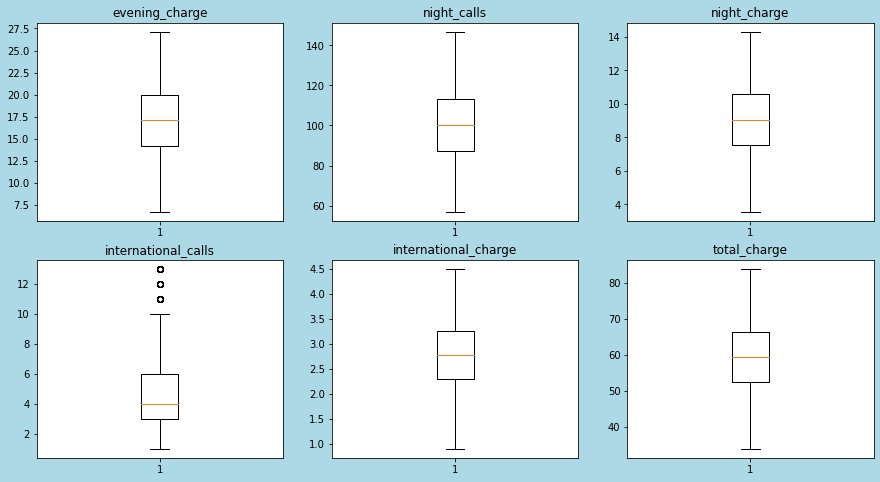

In [104]:
plt.figure(figsize=(15,8),facecolor='lightblue')
plt.subplot(2,3,1)
plt.boxplot(df2['evening_charge'])
plt.title("evening_charge")
plt.subplot(2,3,2)
plt.boxplot(df2['night_calls'])
plt.title("night_calls")
plt.subplot(2,3,3)
plt.boxplot(df2['night_charge'])
plt.title("night_charge")
plt.subplot(2,3,4)
plt.boxplot(df2['international_calls'])
plt.title("international_calls")
plt.subplot(2,3,5)
plt.boxplot(df2['international_charge'])
plt.title("international_charge")
plt.subplot(2,3,6)
plt.boxplot(df2['total_charge'])
plt.title("total_charge")
plt.show()

As we can see outlier has been removed from majority of the features

### 1.9 Balancing the Data Set

In [105]:
from sklearn.utils import resample

In [106]:
df2.shape

(3333, 19)

In [107]:
churn_data = df2[df2["churn"] == 1]
no_churn_data  = df2[df2["churn"] == 0]
print(churn_data.shape)
print(no_churn_data.shape)

(483, 19)
(2850, 19)


In [108]:
churn_upsample = resample(churn_data,
             replace=True,
             n_samples=len(no_churn_data),
             random_state=42)
print(churn_upsample.shape)

(2850, 19)


0    2850
1    2850
Name: churn, dtype: int64


<AxesSubplot:ylabel='Type'>

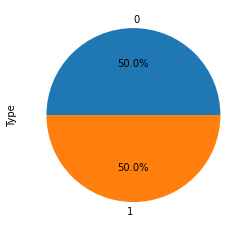

In [109]:
data_upsampled = pd.concat([no_churn_data, churn_upsample])

print(data_upsampled["churn"].value_counts())

data_upsampled.groupby('churn').size().plot(kind='pie',
                                       y = "churn",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [110]:
# Number of Churn and Non-churn obeseravtions are equal

In [111]:
data_upsampled.head(5)

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128.0,1,25.0,265.1,197.400,244.7,10.0,1.0,0,110.0,45.07,99.0,16.7800,91.0,11.01,3.0,2.70,75.56,0
1,107.0,1,26.0,161.6,195.500,254.4,13.7,1.0,0,123.0,27.47,103.0,16.6200,103.0,11.45,3.0,3.70,59.24,0
2,137.0,0,0.0,243.4,121.200,162.6,12.2,0.0,0,114.0,41.38,110.0,10.3000,104.0,7.32,5.0,3.29,62.29,0
3,84.0,0,0.0,299.4,79.524,196.9,6.6,2.0,1,71.0,50.90,88.0,6.7592,89.0,8.86,7.0,1.78,66.80,0
4,75.0,0,0.0,166.7,148.300,186.9,10.1,3.0,1,113.0,28.34,122.0,12.6100,121.0,8.41,3.0,2.73,52.09,0


In [112]:
df_final=data_upsampled.copy()

In [113]:
df_final.shape

(5700, 19)

In [114]:
# Upsampled data set has 5700 rows

### 2.0 Feature Selection using Decision Tree

In [115]:
# Feature Importance with Extra Trees Classifier
from pandas import read_csv
from sklearn.tree import  DecisionTreeClassifier
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data
array_1 = df_final.values

In [116]:
X = array_1[:,0:18]
Y = array_1[:,18]

In [117]:
X

array([[128.  ,   1.  ,  25.  , ...,   3.  ,   2.7 ,  75.56],
       [107.  ,   1.  ,  26.  , ...,   3.  ,   3.7 ,  59.24],
       [137.  ,   0.  ,   0.  , ...,   5.  ,   3.29,  62.29],
       ...,
       [ 98.  ,   0.  ,   0.  , ...,   2.  ,   3.35,  74.93],
       [161.  ,   0.  ,   0.  , ...,   4.  ,   3.62,  51.49],
       [122.  ,   1.  ,  33.  , ...,   3.  ,   3.65,  61.89]])

In [118]:
Y

array([0., 0., 0., ..., 1., 1., 1.])

In [119]:
# feature extraction
model = DecisionTreeClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.01646436 0.02599653 0.0085502  0.00504136 0.0132855  0.02264696
 0.00666966 0.19680441 0.15494797 0.03509572 0.00181881 0.01732821
 0.00746466 0.02708251 0.0163194  0.08672631 0.03093926 0.32681818]


In [120]:
Feature_imp=np.round((pd.DataFrame(model.feature_importances_,columns=['Feature_Imp'])),2)

In [121]:
Feature_imp

,Feature_Imp
0,0.02
1,0.03
2,0.01
3,0.01
4,0.01
5,0.02
6,0.01
7,0.20
8,0.15
9,0.04


In [122]:
result_columns=pd.DataFrame(df_final.columns,columns=['Feature_Names'])

In [123]:
result_columns

,Feature_Names
0,account_length
1,voice_mail_plan
2,voice_mail_messages
3,day_mins
4,evening_mins
5,night_mins
6,international_mins
7,customer_service_calls
8,international_plan
9,day_calls


In [124]:
result_columns = result_columns.drop(18)

In [125]:
result_columns

,Feature_Names
0,account_length
1,voice_mail_plan
2,voice_mail_messages
3,day_mins
4,evening_mins
5,night_mins
6,international_mins
7,customer_service_calls
8,international_plan
9,day_calls


In [126]:
result = pd.concat([result_columns,Feature_imp],axis=1)

In [127]:
result

,Feature_Names,Feature_Imp
0,account_length,0.02
1,voice_mail_plan,0.03
2,voice_mail_messages,0.01
3,day_mins,0.01
4,evening_mins,0.01
5,night_mins,0.02
6,international_mins,0.01
7,customer_service_calls,0.20
8,international_plan,0.15
9,day_calls,0.04


Features having High imp = total_charge, customer_service_calls, international_plan
Features having moderate imp = international_calls, night_charge,night_calls

In [128]:
high_imp_feature=result[result['Feature_Imp']>=0.1]
print(high_imp_feature)

             Feature_Names  Feature_Imp
7   customer_service_calls         0.20
8       international_plan         0.15
17            total_charge         0.33


In [129]:
moderate_imp_feature=result[result['Feature_Imp'].between(0.01,0.1)]
print(moderate_imp_feature)

           Feature_Names  Feature_Imp
0         account_length         0.02
1        voice_mail_plan         0.03
2    voice_mail_messages         0.01
3               day_mins         0.01
4           evening_mins         0.01
5             night_mins         0.02
6     international_mins         0.01
9              day_calls         0.04
11         evening_calls         0.02
12        evening_charge         0.01
13           night_calls         0.03
14          night_charge         0.02
15   international_calls         0.09
16  international_charge         0.03


In [130]:
low_imp_feature=result[result['Feature_Imp']==0.00]
print(low_imp_feature)

   Feature_Names  Feature_Imp
10    day_charge          0.0


We can remove **voice_mail_plan & day_mins** from data

# Model Building

In [131]:
df_final.head()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128.0,1,25.0,265.1,197.400,244.7,10.0,1.0,0,110.0,45.07,99.0,16.7800,91.0,11.01,3.0,2.70,75.56,0
1,107.0,1,26.0,161.6,195.500,254.4,13.7,1.0,0,123.0,27.47,103.0,16.6200,103.0,11.45,3.0,3.70,59.24,0
2,137.0,0,0.0,243.4,121.200,162.6,12.2,0.0,0,114.0,41.38,110.0,10.3000,104.0,7.32,5.0,3.29,62.29,0
3,84.0,0,0.0,299.4,79.524,196.9,6.6,2.0,1,71.0,50.90,88.0,6.7592,89.0,8.86,7.0,1.78,66.80,0
4,75.0,0,0.0,166.7,148.300,186.9,10.1,3.0,1,113.0,28.34,122.0,12.6100,121.0,8.41,3.0,2.73,52.09,0


In [132]:
# Features and Labels
X = df_final.iloc[:, 0:17]
Y = df_final.iloc[:,18] # Churn

In [133]:
X

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge
0,128.0,1,25.0,265.1,197.400,244.7,10.0,1.0,0,110.0,45.07,99.0,16.7800,91.0,11.01,3.0,2.70
1,107.0,1,26.0,161.6,195.500,254.4,13.7,1.0,0,123.0,27.47,103.0,16.6200,103.0,11.45,3.0,3.70
2,137.0,0,0.0,243.4,121.200,162.6,12.2,0.0,0,114.0,41.38,110.0,10.3000,104.0,7.32,5.0,3.29
3,84.0,0,0.0,299.4,79.524,196.9,6.6,2.0,1,71.0,50.90,88.0,6.7592,89.0,8.86,7.0,1.78
4,75.0,0,0.0,166.7,148.300,186.9,10.1,3.0,1,113.0,28.34,122.0,12.6100,121.0,8.41,3.0,2.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,121.0,0,0.0,167.7,93.700,241.3,13.4,3.0,1,94.0,28.51,121.0,7.9600,115.0,10.86,1.0,3.62
2419,37.0,0,0.0,239.9,261.600,207.1,8.9,2.0,0,120.0,40.78,88.0,22.2400,88.0,9.32,4.0,2.40
2213,98.0,0,0.0,217.2,303.400,197.1,12.4,0.0,0,121.0,36.92,73.0,25.7900,71.0,8.87,2.0,3.35
905,161.0,0,0.0,191.9,79.524,204.8,13.4,4.0,0,113.0,32.62,87.0,6.7592,107.0,9.22,4.0,3.62


In [134]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
830     1
2419    1
2213    1
905     1
968     1
Name: churn, Length: 5700, dtype: category
Categories (2, int64): [0, 1]

In [135]:
df_final["churn"].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [136]:
df_final["churn"].value_counts()

0    2850
1    2850
Name: churn, dtype: int64

In [137]:
# Splitting the dataset into the Training and Test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [138]:
X_train.count()

account_length            4560
voice_mail_plan           4560
voice_mail_messages       4560
day_mins                  4560
evening_mins              4560
night_mins                4560
international_mins        4560
customer_service_calls    4560
international_plan        4560
day_calls                 4560
day_charge                4560
evening_calls             4560
evening_charge            4560
night_calls               4560
night_charge              4560
international_calls       4560
international_charge      4560
dtype: int64

In [139]:
X_test.count()

account_length            1140
voice_mail_plan           1140
voice_mail_messages       1140
day_mins                  1140
evening_mins              1140
night_mins                1140
international_mins        1140
customer_service_calls    1140
international_plan        1140
day_calls                 1140
day_charge                1140
evening_calls             1140
evening_charge            1140
night_calls               1140
night_charge              1140
international_calls       1140
international_charge      1140
dtype: int64

# 1)Decision Tree Classifier

In [140]:
from sklearn.tree import  DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [141]:
predictions = dtc.predict(X_test)
predictions

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [142]:
dtc.predict_proba(X_test)

array([[0.12132353, 0.87867647],
       [0.84307179, 0.15692821],
       [0.84307179, 0.15692821],
       ...,
       [0.12132353, 0.87867647],
       [0.73313783, 0.26686217],
       [0.        , 1.        ]])

In [143]:
pd.crosstab(y_test,predictions)

col_0,0,1
churn,,
0,541,32
1,91,476


In [144]:
# Accuracy
from sklearn.metrics import accuracy_score,confusion_matrix
np.mean(predictions==y_test)
print(" DecisionTreeClassifier Using Entropy Accuracy:",accuracy_score(y_test,predictions))

 DecisionTreeClassifier Using Entropy Accuracy: 0.8921052631578947


In [145]:
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score

In [146]:
print(classification_report(y_test,predictions,target_names=['no_churn','churn']))

              precision    recall  f1-score   support

    no_churn       0.86      0.94      0.90       573
       churn       0.94      0.84      0.89       567

    accuracy                           0.89      1140
   macro avg       0.90      0.89      0.89      1140
weighted avg       0.90      0.89      0.89      1140



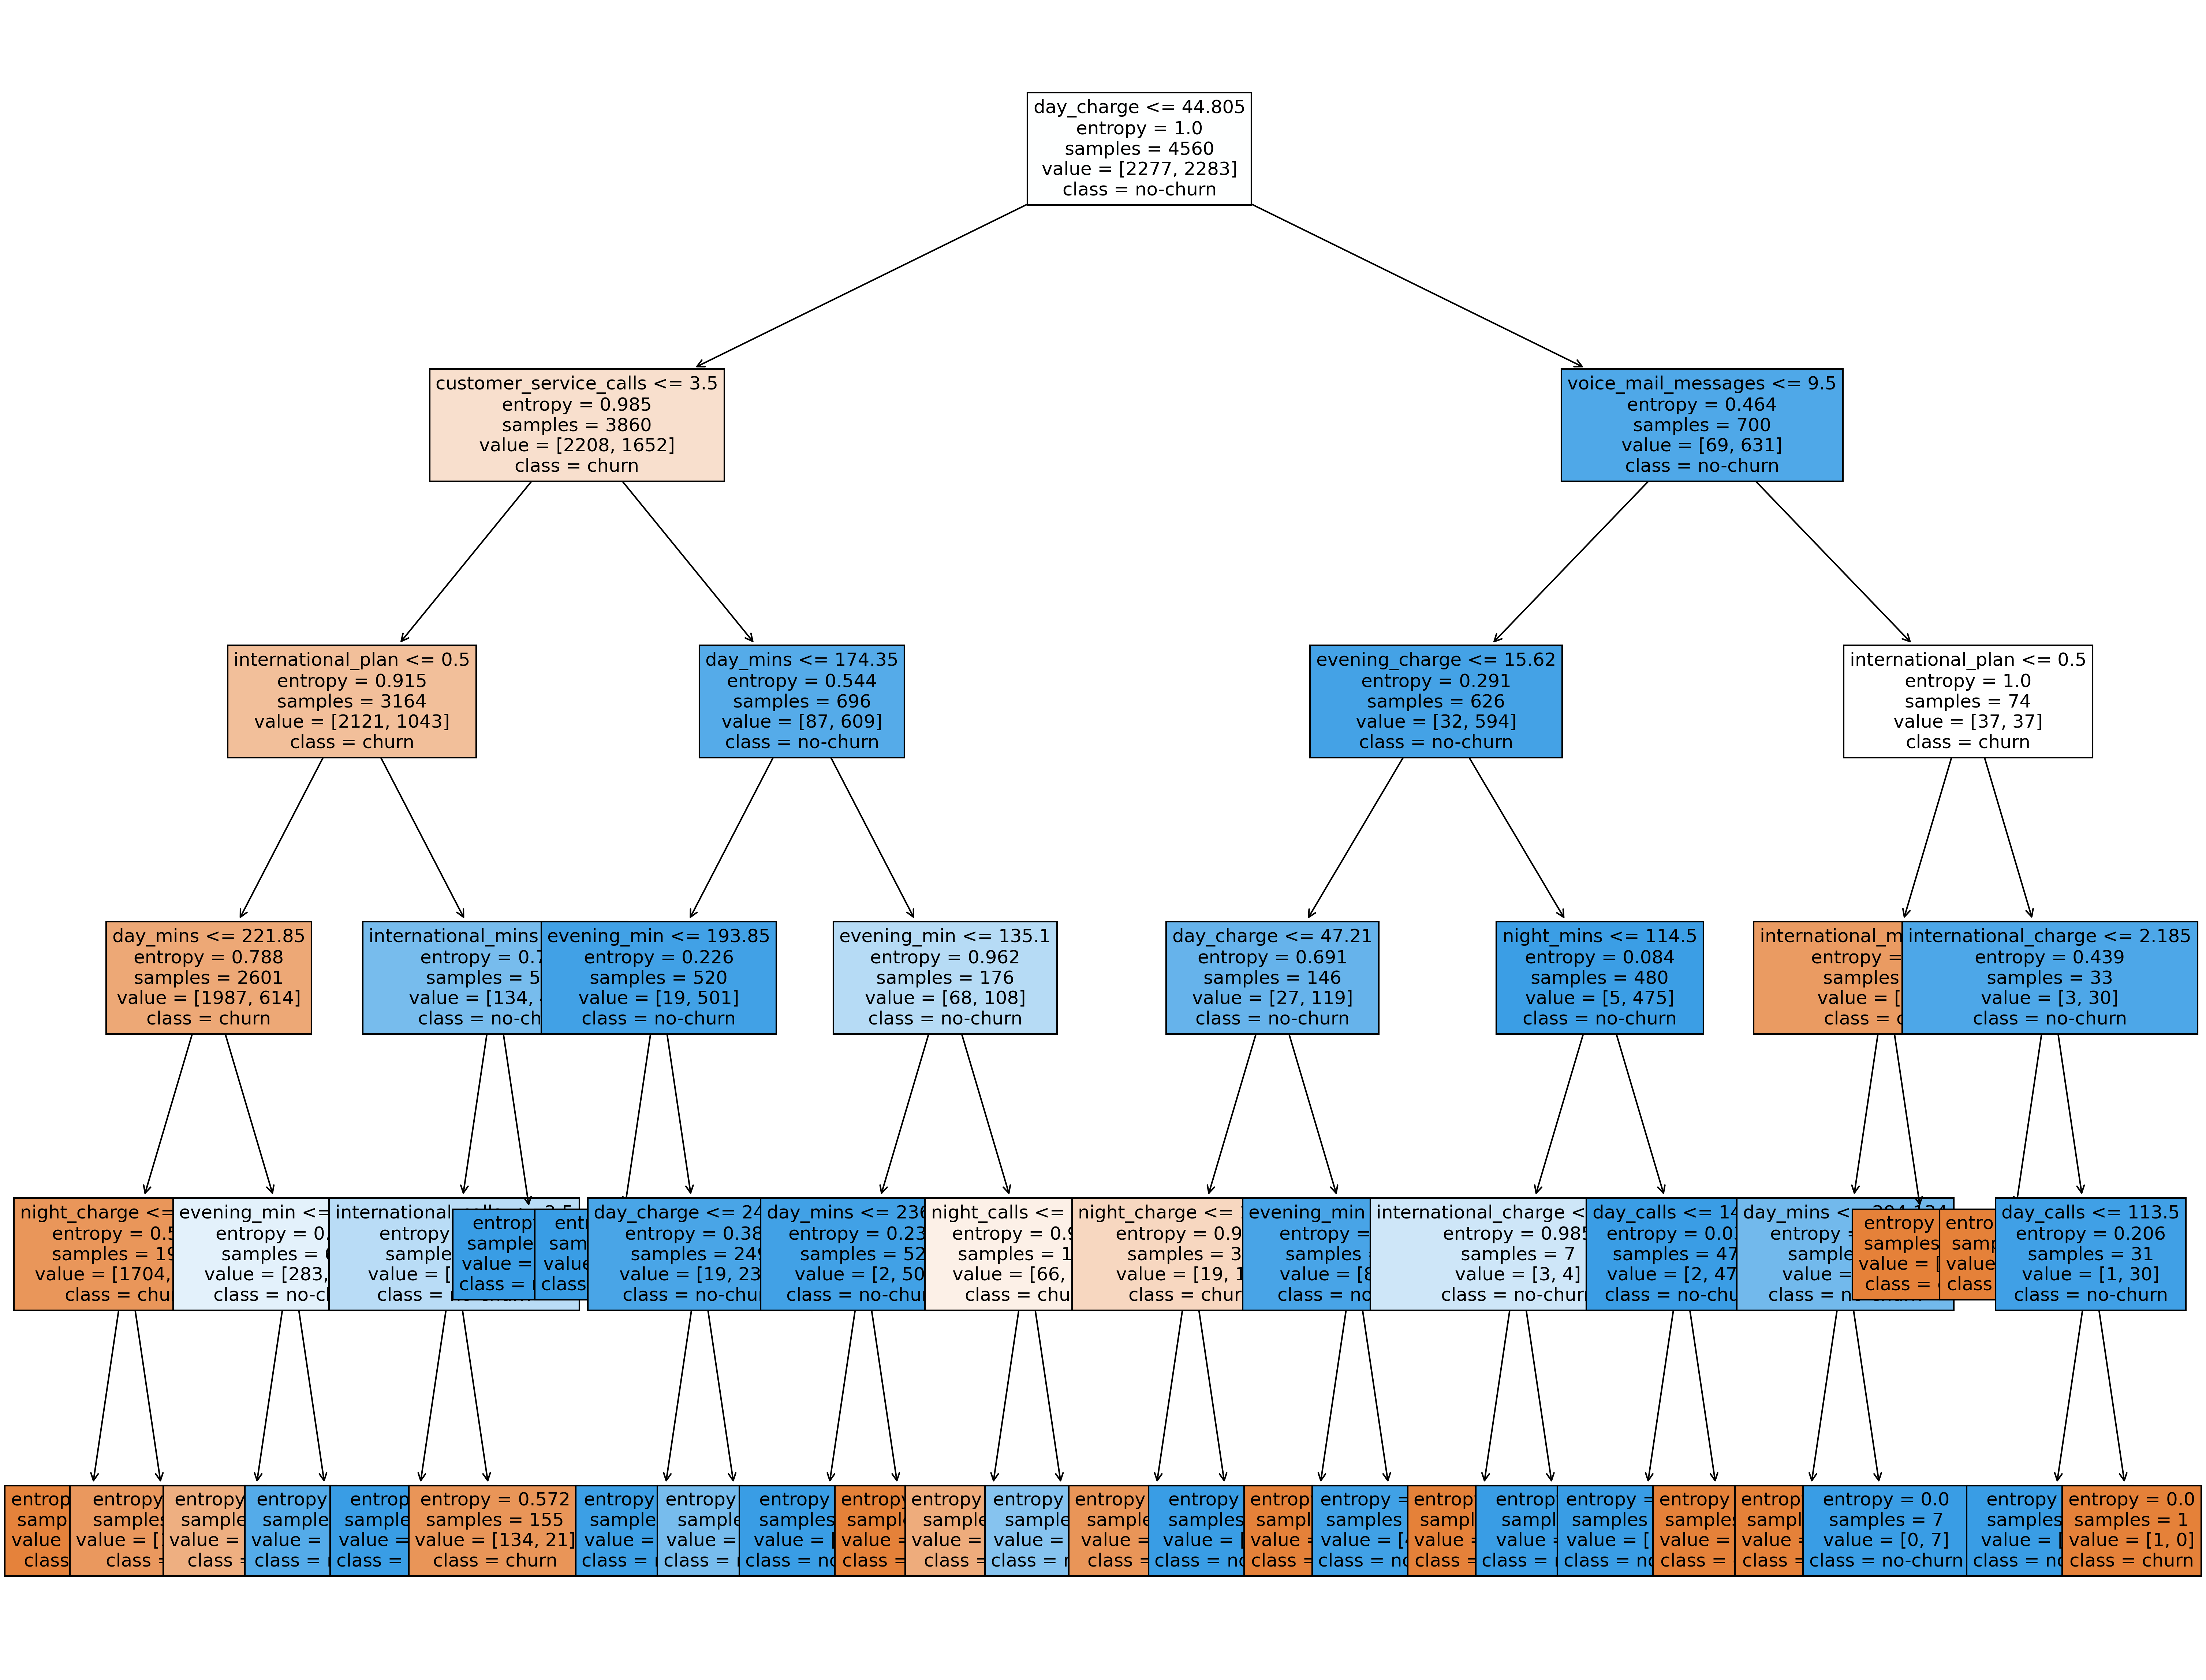

In [147]:
#PLot the decision tree
from sklearn import tree
fn=['account_length','voice_mail_plan','voice_mail_messages','day_mins','evening_min','night_mins','international_mins',
    'customer_service_calls','international_plan','day_calls','day_charge','evening_calls','evening_charge','night_calls',
    'night_charge','international_calls','international_charge','total_charge']
cn=['churn', 'no-churn']
fig,axes = plt.subplots(nrows = 1,ncols = 1,figsize = (25,20), dpi=300)
tree.plot_tree(dtc,
               feature_names = fn, 
               class_names=cn,
               filled = True,fontsize=12);

# 2)Decision Tree CART classification Model

In [148]:
# CART Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

#array = df_final.values
#X = array[:,0:17]
#Y = array[:,18]
# Features and Labels
X = df_final.iloc[:, 0:17]
Y = df_final.iloc[:,18] # Churn
kfold = KFold(n_splits=10)

model_C = DecisionTreeClassifier(criterion='gini')

results = cross_val_score(model_C, X, Y, cv=kfold)
print(results.mean())

model_C = DecisionTreeClassifier()
dt=model_C.fit(X,Y)

0.9729824561403507


# 3)Random Forest Model

In [149]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
  
# Instantiate the classifier
rfc = RandomForestClassifier()
  
# Fit to the training data
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [150]:
# Predict the labels for the test set
y_pred = rfc.predict(X_test)

In [151]:
# Compute accuracy
from sklearn.metrics import accuracy_score
  
print("RandomForestClassifier Accuracy:",accuracy_score(y_test, y_pred))

RandomForestClassifier Accuracy: 0.9885964912280701


In [152]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[563  10]
 [  3 564]]


In [153]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,target_names=['no_churn','churn']))

              precision    recall  f1-score   support

    no_churn       0.99      0.98      0.99       573
       churn       0.98      0.99      0.99       567

    accuracy                           0.99      1140
   macro avg       0.99      0.99      0.99      1140
weighted avg       0.99      0.99      0.99      1140



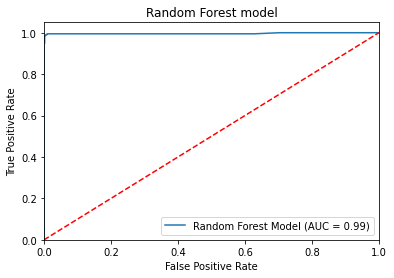

In [154]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

random_roc_auc = roc_auc_score(y_test, rfc.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Random Forest Model (AUC = %0.2f)' % random_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest model')
plt.legend(loc="lower right")
plt.savefig('RFC_ROC')
plt.show()

# 4)Logistic Regression Model

In [155]:
from sklearn.linear_model import LogisticRegression

In [156]:
# Dividing our data into input and output variable
X = df_final.iloc[:, 0:17]
Y = df_final.iloc[:,18] # Churn

In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(solver='newton-cg',penalty='l2')
logreg = LogisticRegression().fit(X_train,y_train)
predicted = logreg.predict(X_test)
print("LogisticRegression Accuracy:", metrics.accuracy_score(y_test,predicted))

LogisticRegression Accuracy: 0.7078947368421052


C:\Users\A\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [158]:
print("Confusion matrix:")
print (metrics.confusion_matrix(y_test,predicted))

Confusion matrix:
[[394 179]
 [154 413]]


In [159]:
print(classification_report(y_test,predicted,target_names=['no_churn','churn']))

              precision    recall  f1-score   support

    no_churn       0.72      0.69      0.70       573
       churn       0.70      0.73      0.71       567

    accuracy                           0.71      1140
   macro avg       0.71      0.71      0.71      1140
weighted avg       0.71      0.71      0.71      1140



# Receiver Operating Characteristics(ROC) Curve

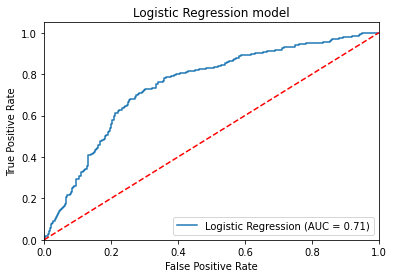

In [160]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# 5) Multinomial Naive bayes model

In [161]:
#model building MNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

#model generation using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train,y_train)
predicted = clf.predict(X_test)
print("MultinomialNB Accuracy:", metrics.accuracy_score(y_test,predicted))

MultinomialNB Accuracy: 0.6078947368421053


In [162]:
print("Confusion matrix:")
print (metrics.confusion_matrix(y_test,predicted))

Confusion matrix:
[[331 242]
 [205 362]]


In [163]:
print(classification_report(y_test,predicted,target_names=['no_churn','churn']))

              precision    recall  f1-score   support

    no_churn       0.62      0.58      0.60       573
       churn       0.60      0.64      0.62       567

    accuracy                           0.61      1140
   macro avg       0.61      0.61      0.61      1140
weighted avg       0.61      0.61      0.61      1140



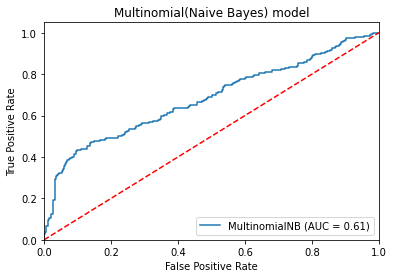

In [164]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
clf_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='MultinomialNB (AUC = %0.2f)' % clf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multinomial(Naive Bayes) model')
plt.legend(loc="lower right")
plt.savefig('clf_ROC')
plt.show()

# 6)Gaussian Naive bayes 

In [165]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB

model=GaussianNB()
model=model.fit(X_train,y_train)

In [166]:
y_test_pred=model.predict(X_test)

In [167]:
print("Gaussian NB Accuracy:", metrics.accuracy_score(y_test,y_test_pred))

Gaussian NB Accuracy: 0.8087719298245614


# 7) AdaBoostClassifier

In [168]:
from sklearn.ensemble import AdaBoostClassifier
model_a = AdaBoostClassifier()

model_a.fit(X_train,y_train)
preds = model_a.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8517543859649123

# 8) Stacking Ensemble for Classification¶

In [169]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
# Features and Labels
X = df_final.iloc[:, 0:17]
Y = df_final.iloc[:,18] # Churn
#array = df_final.values
#X = array[:,0:17]
#Y = array[:,18]
num_trees = 10
kfold = KFold(n_splits=10) #random_state=7, shuffle=True)

# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

C:\Users\A\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\A\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

0.8587719298245613


In [170]:
results

array([0.89298246, 0.91754386, 0.94385965, 0.90526316, 0.9245614 ,
       0.78947368, 0.76842105, 0.83157895, 0.78596491, 0.82807018])

# 9) XGBClassifier

In [171]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
preds = xgb.predict(X_test)
#metrics.accuracy_score(y_test, preds)
predictio = [round(value) for value in preds]

In [172]:
accuracy = accuracy_score(y_test,predictio)
print("Accuracy:%.2f%%"%(accuracy*100.0))

Accuracy:98.95%


# 11)SVM model

In [173]:
from sklearn.svm import SVC
model_svc = SVC(kernel = 'rbf',random_state = 0,gamma = 50,C=15)

In [174]:
model_svc.fit(X_train,y_train)

SVC(C=15, gamma=50, random_state=0)

In [175]:
#svc.score(X_test,y_test)

In [176]:
y_predicted=model_svc.predict(X_test)

In [177]:
print("Gaussian NB Accuracy:", metrics.accuracy_score(y_test,y_predicted))

Gaussian NB Accuracy: 0.9947368421052631


In [178]:
print(classification_report(y_test,y_predicted,target_names=['no_churn','churn']))

              precision    recall  f1-score   support

    no_churn       0.99      1.00      0.99       573
       churn       1.00      0.99      0.99       567

    accuracy                           0.99      1140
   macro avg       0.99      0.99      0.99      1140
weighted avg       0.99      0.99      0.99      1140



In [179]:
'''''Ridge Classifier
   from sklearn.linear_model import RidgeClassifier
  ridgeR =RidgeClassifier(alpha = 1,random_state= 42)
  ridgeR.fit(X_train,y_train)
  y_pred = ridgeR.predict(X_test)
  ridgeR.fit(X_train,y_train)
  #ridgeR.score(X_test,y_test)
  accuracy_score(y_test,y_pred)
   print("Ridge Classifier Accuracy:", metrics.accuracy_score(y_test,y_pred))'''''

'\'\'Ridge Classifier\n   from sklearn.linear_model import RidgeClassifier\n  ridgeR =RidgeClassifier(alpha = 1,random_state= 42)\n  ridgeR.fit(X_train,y_train)\n  y_pred = ridgeR.predict(X_test)\n  ridgeR.fit(X_train,y_train)\n  #ridgeR.score(X_test,y_test)\n  accuracy_score(y_test,y_pred)\n   print("Ridge Classifier Accuracy:", metrics.accuracy_score(y_test,y_pred))'

In [180]:
''''Lasso Classifier
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
model_lasso = Lasso(alpha=1)
model_lasso.fit(X_train, y_train)
pred_train_lasso= model_lasso.predict(X_train)
pred_test_lasso= model_lasso.predict(X_test)
## Evaluate the lasso model
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso)))
print(r2_score(y_test, pred_test_lasso))'''

"'Lasso Classifier\nfrom sklearn.linear_model import Lasso\nfrom sklearn.metrics import r2_score\nfrom sklearn.metrics import mean_squared_error\nfrom math import sqrt\nmodel_lasso = Lasso(alpha=1)\nmodel_lasso.fit(X_train, y_train)\npred_train_lasso= model_lasso.predict(X_train)\npred_test_lasso= model_lasso.predict(X_test)\n## Evaluate the lasso model\nprint(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))\nprint(r2_score(y_train, pred_train_lasso))\nprint(np.sqrt(mean_squared_error(y_test,pred_test_lasso)))\nprint(r2_score(y_test, pred_test_lasso))"

# Multilayer Perceptons Model

In [181]:
from sklearn.neural_network import MLPClassifier

In [182]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30))

In [183]:
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(30, 30))

In [184]:
prediction_train=mlp.predict(X_train)
prediction_test = mlp.predict(X_test)

In [185]:
prediction_test

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [186]:
prediction_train

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [187]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,prediction_test))
np.mean(y_test==prediction_test)
np.mean(y_train==prediction_train)

[[475  98]
 [111 456]]


0.8127192982456141

# Model Neural Network

In [188]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Activation

In [189]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy

In [190]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# split into input (X) and output (Y) variables
# Dividing our data into input and output variable
X = df_final.iloc[:, 0:17]
Y = df_final.iloc[:,18] # Churn

In [191]:
# create model
model_s = Sequential()
model_s.add(Dense(12, input_dim=17, kernel_initializer='uniform', activation='relu'))
model_s.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model_s.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [192]:
# Compile model
model_s.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [193]:
# Fit the model
history=model_s.fit(X, Y, validation_split=0.2, epochs=50, batch_size=10)

Epoch 1/50
456/456 [==============================] - 3s 4ms/step - loss: 0.6595 - accuracy: 0.6300 - val_loss: 0.8153 - val_accuracy: 0.4044
Epoch 2/50
456/456 [==============================] - 1s 3ms/step - loss: 0.6186 - accuracy: 0.6846 - val_loss: 0.8836 - val_accuracy: 0.3491
Epoch 3/50
456/456 [==============================] - 1s 3ms/step - loss: 0.5957 - accuracy: 0.7112 - val_loss: 0.8618 - val_accuracy: 0.3833
Epoch 4/50
456/456 [==============================] - 1s 3ms/step - loss: 0.5927 - accuracy: 0.7044 - val_loss: 0.7894 - val_accuracy: 0.4281
Epoch 5/50
456/456 [==============================] - 1s 3ms/step - loss: 0.5847 - accuracy: 0.7092 - val_loss: 0.8634 - val_accuracy: 0.4430
Epoch 6/50
456/456 [==============================] - 1s 3ms/step - loss: 0.5769 - accuracy: 0.7105 - val_loss: 0.7517 - val_accuracy: 0.4500
Epoch 7/50
456/456 [==============================] - 1s 3ms/step - loss: 0.5688 - accuracy: 0.7105 - val_loss: 0.8152 - val_accuracy: 0.3781
Epoch 

In [194]:
# evaluate the model
scores = model_s.evaluate(X, Y)
print("%s: %.2f%%" % (model_s.metrics_names[1], scores[1]*100))

179/179 [==============================] - 1s 3ms/step - loss: 0.4946 - accuracy: 0.7886
accuracy: 78.86%


In [195]:
# Visualize training history

# list all data in history
model_s.history.history.keys()
#model.history.history['val_loss']

dict_keys([])

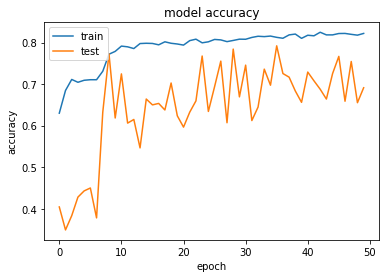

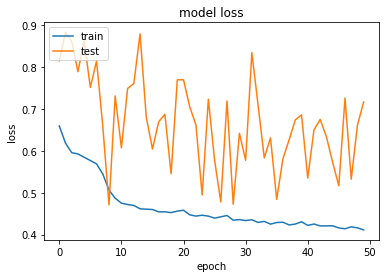

In [196]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [197]:
#Saving best model 
import joblib
#Sava the model to disk
filename = 'model.sav'
joblib.dump(rfc, filename)

['model.sav']